In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

In [2]:
from PIL import Image, ImageDraw
import io
from io import BytesIO
import requests
import matplotlib.pyplot as plt

In [3]:
subscription_key='1cb018e0e41f4ecca1cd4d457ba0e81c'
endpoint='https://computervision-saurabh.cognitiveservices.azure.com/'
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [4]:
 remote_image_url= "https://images.unsplash.com/photo-1477587458883-47145ed94245?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"

In [5]:
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url)

In [6]:
print('Detecting Objects:')

# Get the captions (descriptions) from the response, with confidence level
print("Description of remote image: ")
if len(detect_objects_results_remote.objects) == 0:
    print("No objects detected.")
else:
    for objects in detect_objects_results_remote.objects:
        print("'{}' with confidence {:.2f}% at location {}, {}, {}, {}".
              format(objects.object_property, objects.confidence * 100,\
                     objects.rectangle.x, objects.rectangle.x+ objects.rectangle.w,\
                     objects.rectangle.y, objects.rectangle.y + objects.rectangle.h))

Detecting Objects:
Description of remote image: 
'Land vehicle' with confidence 65.80% at location 42, 146, 354, 435
'person' with confidence 57.40% at location 638, 693, 397, 492
'horse' with confidence 52.50% at location 110, 300, 344, 558
'horse' with confidence 72.40% at location 401, 619, 363, 566


In [7]:
detected_object = detect_objects_results_remote.objects

In [8]:
for obj in detected_object:
    print("Object's Name: ", obj.object_property)
    print("Object's Score: ", obj.confidence)

Object's Name:  Land vehicle
Object's Score:  0.658
Object's Name:  person
Object's Score:  0.574
Object's Name:  horse
Object's Score:  0.525
Object's Name:  horse
Object's Score:  0.724


In [9]:
response = requests.get("https://images.unsplash.com/photo-1477587458883-47145ed94245?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80")
image_data = response.content

In [10]:
image = Image.open(io.BytesIO(image_data))

In [11]:
image = image.resize((new_width, new_height))

NameError: name 'new_width' is not defined

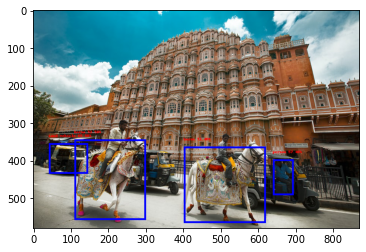

In [12]:
image = Image.open(io.BytesIO(image_data))
draw = ImageDraw.Draw(image)
for obj in detected_object:
    x,y = obj.rectangle.x, obj.rectangle.y
    w,h = obj.rectangle.w, obj.rectangle.h
    draw.rectangle([x, y, x+w, y+h], outline = 'blue', width = 5)
    text = '{} {:.2f}%'.format(obj.object_property, obj.confidence * 100)
    draw.text((x, y-25), text, fill='red')
    
# Show image
image.show()
plt.imshow(image);

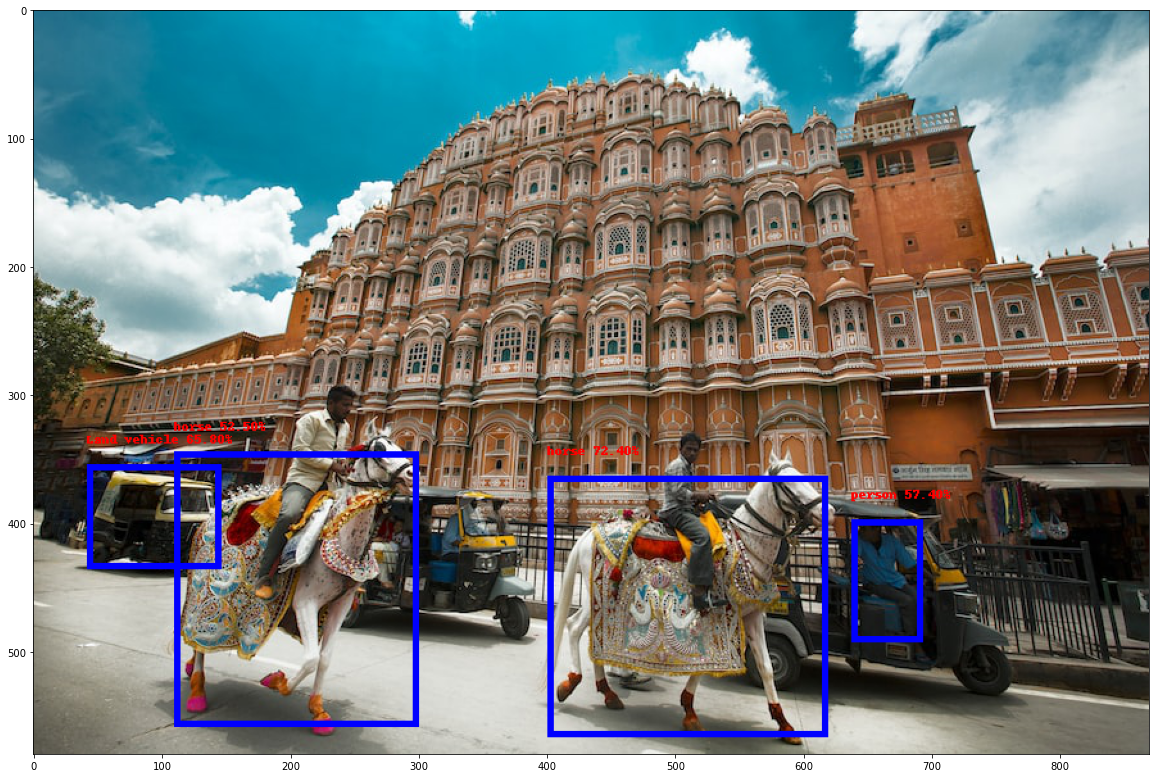

In [13]:
image = Image.open(io.BytesIO(image_data))
draw = ImageDraw.Draw(image)
for obj in detected_object:
    x, y = obj.rectangle.x, obj.rectangle.y
    w, h = obj.rectangle.w, obj.rectangle.h
    draw.rectangle([x, y, x+w, y+h], outline='blue', width=5)
    text = '{} {:.2f}%'.format(obj.object_property, obj.confidence * 100)
    draw.text((x, y-25), text, fill='red')

# Show image with enlarged size
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)
plt.show()

In [14]:
from PIL import Image, ImageDraw, ImageFont

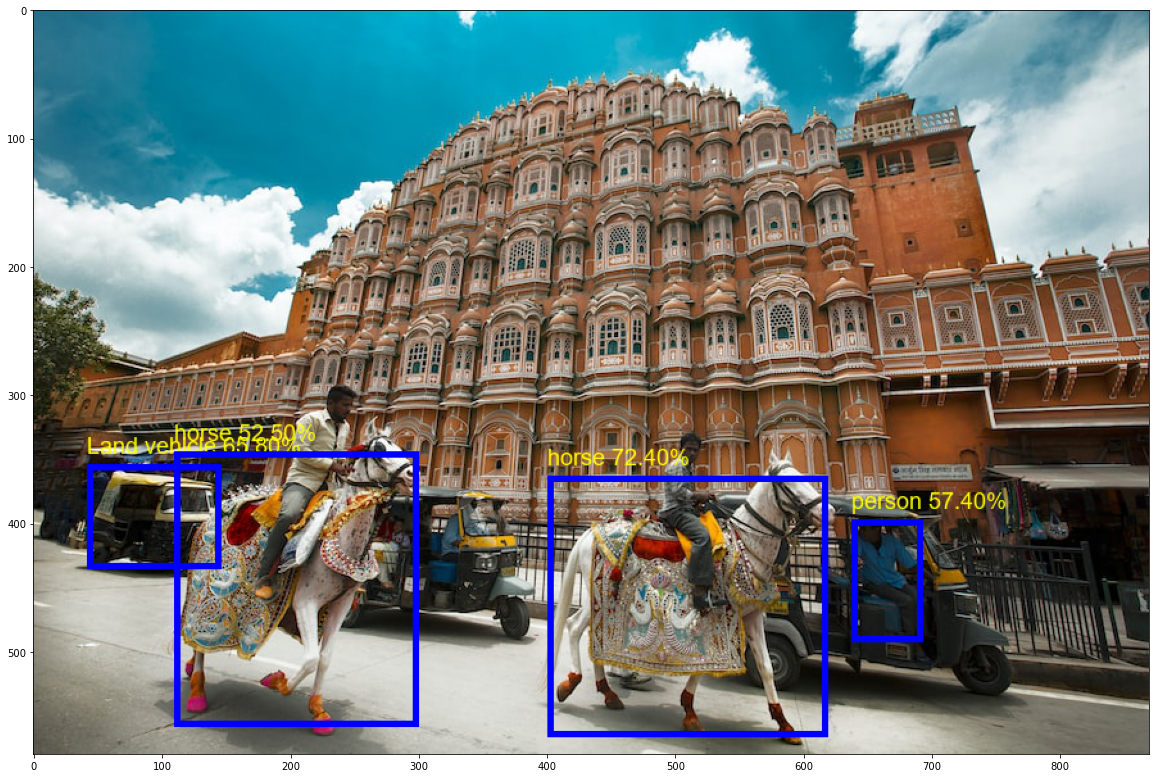

In [23]:
image = Image.open(io.BytesIO(image_data))
draw = ImageDraw.Draw(image)
font_size = 18  # set the font size to 24
for obj in detected_object:
    x, y = obj.rectangle.x, obj.rectangle.y
    w, h = obj.rectangle.w, obj.rectangle.h
    draw.rectangle([x, y, x+w, y+h], outline='blue', width=5)
    text = '{} {:.2f}%'.format(obj.object_property, obj.confidence * 100)
    draw.text((x, y-25), text, fill='yellow', font=ImageFont.truetype("arial.ttf", font_size))

# Show image with enlarged size
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)
plt.show()

In [16]:
'''
Describe an Image - remote
This example describes the contents of an image with the confidence score.
'''
print("===== Describe an image - remote =====")
# Call API
description_results = computervision_client.describe_image(remote_image_url)

# Get the captions (descriptions) from the response, with confidence level
print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

===== Describe an image - remote =====
Description of remote image: 
'a couple of men riding horses in front of a building' with confidence 43.90%


In [17]:
'''
Categorize an Image - remote
This example extracts (general) categories from a remote image with a confidence score.
'''
print("===== Categorize an image - remote =====")
# Select the visual feature(s) you want.
remote_image_features = ["categories"]
# Call API with URL and features
categorize_results_remote = computervision_client.analyze_image(remote_image_url , remote_image_features)

# Print results with confidence score
print("Categories from remote image: ")
if (len(categorize_results_remote.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_results_remote.categories:
        print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))

===== Categorize an image - remote =====
Categories from remote image: 
'building_' with confidence 57.42%
'outdoor_' with confidence 0.78%
'outdoor_street' with confidence 14.84%


In [18]:
'''
Tag an Image - remote
This example returns a tag (key word) for each thing in the image.
'''
print("===== Tag an image - remote =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(remote_image_url )

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

===== Tag an image - remote =====
Tags in the remote image: 
'outdoor' with confidence 99.37%
'sky' with confidence 98.96%
'building' with confidence 97.49%
'cloud' with confidence 97.48%
'road' with confidence 90.67%
'street' with confidence 88.66%
'land vehicle' with confidence 87.93%
'vehicle' with confidence 84.86%
'riding' with confidence 78.34%
'person' with confidence 72.18%
'horse' with confidence 71.70%
'people' with confidence 64.57%
'city' with confidence 61.45%
